### Business Objectives

The case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

### Importing the libraries

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)

In [199]:
app_data = pd.read_csv('application_data.csv')
prev_app = pd.read_csv('previous_application.csv')

In [200]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [201]:
app_data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [202]:
app_data.shape

(307511, 122)

In [203]:
((app_data.isnull().sum()/app_data.shape[0])*100)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

##### Dropping columns have null values greater than or equal to 30%

In [204]:
temp = ((app_data.isnull().sum()/app_data.shape[0])*100).reset_index().rename(columns = {'index':'col_name', 0:'% Missing'})
temp

,col_name,% Missing
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
5,FLAG_OWN_REALTY,0.000000
6,CNT_CHILDREN,0.000000
7,AMT_INCOME_TOTAL,0.000000
8,AMT_CREDIT,0.000000
9,AMT_ANNUITY,0.003902


In [205]:
app_data.shape

(307511, 122)

In [206]:
drop_cols = list(temp[temp['% Missing']>=30]['col_name'])

In [207]:
app_data.drop(drop_cols,axis = 1, inplace = True)

In [208]:
app_data.shape

(307511, 72)

In [209]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
app_data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DA

##### Dropping Unnecessary columns

In [211]:
app_data.drop(['EXT_SOURCE_2',
 'EXT_SOURCE_3','FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR'],axis = 1, inplace = True)

In [212]:
app_data.shape

(307511, 44)

In [213]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0


In [214]:
(app_data.isnull().sum()/app_data.shape[0])*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [215]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [216]:
app_data = app_data[~app_data['CNT_FAM_MEMBERS'].isnull()]

In [217]:
app_data['CNT_FAM_MEMBERS'].isnull().sum()

0

In [218]:
app_data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 276
NAME_TYPE_SUITE                1290
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                0
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_BIRTH                        0
DAYS_EMPLOYED                     0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FLAG_CONT_MOBILE                  0
FLAG_PHONE                        0
FLAG_EMAIL                        0
CNT_FAM_MEMBERS             

#### Dropping rows having null values in AMT_GOODS_PRICE column

In [219]:
app_data = app_data[~app_data.AMT_GOODS_PRICE.isnull()]

In [220]:
app_data[app_data.AMT_ANNUITY.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,1,1,1,1,1,0,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,-2.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,1,1,1,1,0,0,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.0,0.0,0.0,0.0,-706.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,1,1,0,1,0,0,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,1.0,0.0,1.0,0.0,-199.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,1,1,0,1,0,0,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.0,0.0,0.0,0.0,-2841.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,1,1,1,1,1,0,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.0,0.0,0.0,0.0,-743.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,1,1,0,1,0,0,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-1986.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,1,1,0,1,1,0,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.0,0.0,0.0,0.0,-348.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.019689,-13902,-3540,-168.0,-4250,1,1,0,1,0,1,2.0,2,2,SATURDAY,12,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,-1331.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.018634,-10151,-472,-10127.0,-2787,1,1,0,1,1,0,2.0,2,2,WEDNESDAY,13,1,1,1,1,1,1,Security,0.0,0.0,0.0,0.0,-295.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Unaccompanied,Commercial associate,Higher education,Married,Municipal apartment,0.046220,-16344,-1478,-482.0,-4192,1,1,0,1,0,0,2.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Business Entity Type 3,1.0,0.0,1.0,0.0,-1255.0


#### Dropping rows having null values 

In [221]:
app_data = app_data[~app_data.AMT_ANNUITY.isnull()]

In [222]:
app_data.AMT_ANNUITY.isnull().sum()

0

In [223]:
app_data = app_data[~app_data['NAME_TYPE_SUITE'].isnull()]

In [224]:
app_data = app_data[~app_data['OBS_30_CNT_SOCIAL_CIRCLE'].isnull()]

In [225]:
app_data = app_data[~app_data['DEF_30_CNT_SOCIAL_CIRCLE'].isnull()]


In [226]:
app_data = app_data[~app_data['OBS_60_CNT_SOCIAL_CIRCLE'].isnull()]


In [227]:
app_data = app_data[~app_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull()]


In [228]:
app_data = app_data[~app_data['DAYS_LAST_PHONE_CHANGE'].isnull()]

In [229]:
app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_AP

#### Resetting Index

In [230]:
app_data.reset_index(inplace = True, drop = True)

In [231]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0


#### Creating a new column of age

In [232]:
app_data['Age (in Yrs)'] = round(app_data['DAYS_BIRTH']/-365,0)

In [233]:
#app_data['Age (in Yrs)'] = app_data['DAYS_BIRTH'].apply(lambda x: '{} Yrs'.format(round(x/-365)))

#### Changing data type of Age column

In [234]:
app_data['Age (in Yrs)'] = app_data['Age (in Yrs)'].astype('int')

In [235]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs)
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,52
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,52
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,55


In [236]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305185 entries, 0 to 305184
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   305185 non-null  int64  
 1   TARGET                       305185 non-null  int64  
 2   NAME_CONTRACT_TYPE           305185 non-null  object 
 3   CODE_GENDER                  305185 non-null  object 
 4   FLAG_OWN_CAR                 305185 non-null  object 
 5   FLAG_OWN_REALTY              305185 non-null  object 
 6   CNT_CHILDREN                 305185 non-null  int64  
 7   AMT_INCOME_TOTAL             305185 non-null  float64
 8   AMT_CREDIT                   305185 non-null  float64
 9   AMT_ANNUITY                  305185 non-null  float64
 10  AMT_GOODS_PRICE              305185 non-null  float64
 11  NAME_TYPE_SUITE              305185 non-null  object 
 12  NAME_INCOME_TYPE             305185 non-null  object 
 13 

In [237]:
app_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs)
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,52


#### Creating new column for Employment

In [238]:
app_data['Employment'] = round(app_data['DAYS_EMPLOYED']/-365,1)

In [239]:
app_data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26,1.7
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46,3.3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,52,0.6


In [240]:
app_data.rename(columns = {'Employment':'Employment (in Yrs)'}, inplace = True)

In [241]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs)
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26,1.7
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46,3.3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,52,0.6
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,52,8.3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,55,8.3


#### Creating new column for registration

In [242]:
app_data['Registration_change (in Yrs)'] = round(app_data['DAYS_REGISTRATION']/-365,1)

In [243]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs)
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26,1.7,10.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46,3.3,3.2
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,52,0.6,11.7
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,52,8.3,26.9
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,55,8.3,11.8


#### Creating new column for ID Change

In [244]:
app_data['ID_change (in months)'] = round(app_data['DAYS_REGISTRATION']/-30)

In [245]:
app_data['ID_change (in months)'] = app_data['ID_change (in months)'].astype('int')

#### Creating new column for Annuity_amt

In [246]:
app_data['Annuity_amt in Thousand'] = round(app_data['AMT_ANNUITY']/1000,2)

In [247]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26,1.7,10.0,122,24.70
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46,3.3,3.2,40,35.70
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,52,0.6,11.7,142,6.75
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,52,8.3,26.9,328,29.69
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,55,8.3,11.8,144,21.87


In [248]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305185 entries, 0 to 305184
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    305185 non-null  int64  
 1   TARGET                        305185 non-null  int64  
 2   NAME_CONTRACT_TYPE            305185 non-null  object 
 3   CODE_GENDER                   305185 non-null  object 
 4   FLAG_OWN_CAR                  305185 non-null  object 
 5   FLAG_OWN_REALTY               305185 non-null  object 
 6   CNT_CHILDREN                  305185 non-null  int64  
 7   AMT_INCOME_TOTAL              305185 non-null  float64
 8   AMT_CREDIT                    305185 non-null  float64
 9   AMT_ANNUITY                   305185 non-null  float64
 10  AMT_GOODS_PRICE               305185 non-null  float64
 11  NAME_TYPE_SUITE               305185 non-null  object 
 12  NAME_INCOME_TYPE              305185 non-nul

In [249]:
(app_data['AMT_INCOME_TOTAL']/1000).describe()

count    305185.000000
mean        168.614041
std         237.665163
min          25.650000
25%         112.500000
50%         145.800000
75%         202.500000
max      117000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

#### Creating new column for Salary

In [250]:
app_data['Salary in Thousand'] = app_data['AMT_INCOME_TOTAL']/1000

#### Creating new column for Goods_Amt

In [251]:
app_data['Goods_Amt in Thousand'] = app_data['AMT_GOODS_PRICE']/1000

#### Creating new column for Credit_amt

In [252]:
app_data['Credit_amt in Thousand'] = app_data['AMT_CREDIT']/1000

In [253]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand,Salary in Thousand,Goods_Amt in Thousand,Credit_amt in Thousand
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26,1.7,10.0,122,24.70,202.5,351.0,406.5975
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46,3.3,3.2,40,35.70,270.0,1129.5,1293.5025
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,52,0.6,11.7,142,6.75,67.5,135.0,135.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,52,8.3,26.9,328,29.69,135.0,297.0,312.6825
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,55,8.3,11.8,144,21.87,121.5,513.0,513.0000


In [254]:
app_data[app_data['Salary in Thousand']>30000].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand,Salary in Thousand,Goods_Amt in Thousand,Credit_amt in Thousand
12736,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,1,1,0,1,0,0,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,35,2.5,18.5,225,26.19,117000.0,454.5,562.491


#### Checking and Handling Outlier

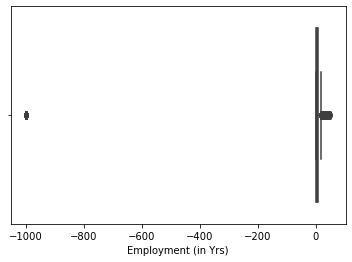

In [255]:
sns.boxplot(app_data['Employment (in Yrs)'])
plt.show()

#### Filling negative employment values in Employment (in Yrs) column with null

In [256]:
app_data.loc[app_data['Employment (in Yrs)']<0,"Employment (in Yrs)"]=np.NaN

In [257]:
app_data['CODE_GENDER'].value_counts()

F      200980
M      104201
XNA         4
Name: CODE_GENDER, dtype: int64

#### Filling 'XNA' in CODE_GENDER column with null

In [258]:
app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']=np.NaN

In [259]:
app_data['CODE_GENDER'].value_counts()

F    200980
M    104201
Name: CODE_GENDER, dtype: int64

In [260]:
app_data[app_data['Employment (in Yrs)'].isnull()].shape

(55006, 52)

In [261]:
app_data['NAME_INCOME_TYPE'].value_counts()

Working                 157654
Commercial associate     70934
Pensioner                54995
State servant            21551
Unemployed                  19
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [262]:
app_data.groupby('NAME_INCOME_TYPE')['Employment (in Yrs)'].mean()

NAME_INCOME_TYPE
Businessman              7.890000
Commercial associate     5.835344
Maternity leave          7.220000
Pensioner               14.387500
State servant            9.461510
Student                  6.847059
Unemployed                    NaN
Working                  6.450162
Name: Employment (in Yrs), dtype: float64

In [263]:
a = app_data[app_data['Employment (in Yrs)'].isnull()]

In [264]:
a.shape

(55006, 52)

In [265]:
a['NAME_INCOME_TYPE'].value_counts()

Pensioner     54987
Unemployed       19
Name: NAME_INCOME_TYPE, dtype: int64

In [266]:
app_data[app_data['NAME_INCOME_TYPE'] == 'Unemployed'].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand,Salary in Thousand,Goods_Amt in Thousand,Credit_amt in Thousand
3905,104600,0,Revolving loans,F,N,Y,2,135000.0,270000.0,13500.0,270000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018029,-15947,365243,-4219.0,-4212,1,0,0,1,0,0,3.0,3,2,MONDAY,11,0,0,0,0,0,0,XNA,2.0,0.0,2.0,0.0,-49.0,44,NaN,11.6,141,13.50,135.00,270.0,270.0
23653,127729,1,Cash loans,F,N,Y,0,99000.0,783000.0,22306.5,783000.0,Unaccompanied,Unemployed,Secondary / secondary special,Widow,House / apartment,0.018209,-23692,365243,-5661.0,-4715,1,0,0,1,0,0,1.0,3,3,TUESDAY,14,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-1436.0,65,NaN,15.5,189,22.31,99.00,783.0,783.0
35087,140949,0,Cash loans,F,N,N,0,56250.0,1530000.0,54954.0,1530000.0,Unaccompanied,Unemployed,Secondary / secondary special,Single / not married,House / apartment,0.011703,-17418,365243,-5086.0,-951,1,0,0,1,0,0,1.0,2,2,MONDAY,12,0,0,0,0,0,0,XNA,3.0,0.0,2.0,0.0,-1169.0,48,NaN,13.9,170,54.95,56.25,1530.0,1530.0
37235,143454,1,Cash loans,M,Y,Y,0,31500.0,585000.0,26892.0,585000.0,Unaccompanied,Unemployed,Secondary / secondary special,Married,House / apartment,0.025164,-12403,365243,-27.0,-866,1,0,0,1,1,1,2.0,2,2,MONDAY,11,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,34,NaN,0.1,1,26.89,31.50,585.0,585.0
41418,148306,0,Revolving loans,F,N,Y,0,270000.0,135000.0,6750.0,135000.0,Unaccompanied,Unemployed,Incomplete higher,Single / not married,Rented apartment,0.014464,-10079,365243,-4340.0,-2484,1,0,0,1,0,0,1.0,2,2,THURSDAY,19,1,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-529.0,28,NaN,11.9,145,6.75,270.00,135.0,135.0


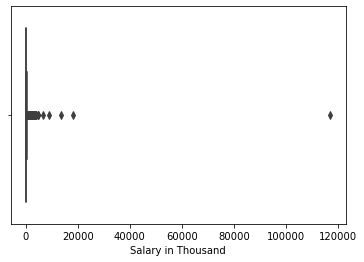

In [267]:
sns.boxplot(app_data['Salary in Thousand'])
plt.show()

#### Removing row having salary greater than 100000

In [268]:
app_data = app_data[~(app_data['Salary in Thousand']>100000)]

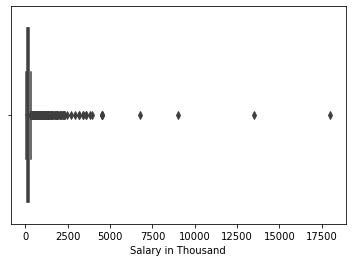

In [269]:
sns.boxplot(app_data['Salary in Thousand'])
plt.show()

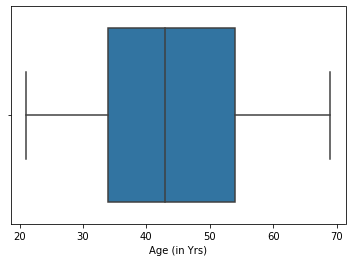

In [270]:
sns.boxplot(app_data['Age (in Yrs)'])
plt.show()

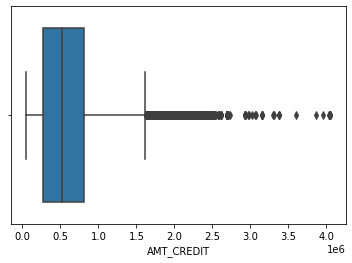

In [271]:
sns.boxplot(app_data.AMT_CREDIT)
plt.show()

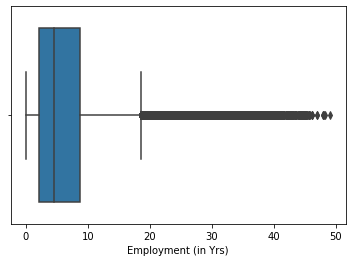

In [272]:
sns.boxplot(app_data['Employment (in Yrs)'])
plt.show()

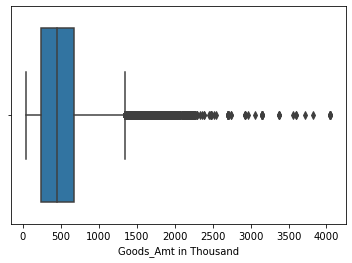

In [273]:
sns.boxplot(app_data['Goods_Amt in Thousand'])
plt.show()

In [274]:
app_data['Goods_Amt in Thousand'].describe()

count    305184.000000
mean        538.227367
std         368.929174
min          40.500000
25%         238.500000
50%         450.000000
75%         679.500000
max        4050.000000
Name: Goods_Amt in Thousand, dtype: float64

In [275]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand,Salary in Thousand,Goods_Amt in Thousand,Credit_amt in Thousand
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26,1.7,10.0,122,24.70,202.5,351.0,406.5975
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46,3.3,3.2,40,35.70,270.0,1129.5,1293.5025
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,52,0.6,11.7,142,6.75,67.5,135.0,135.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,52,8.3,26.9,328,29.69,135.0,297.0,312.6825
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,55,8.3,11.8,144,21.87,121.5,513.0,513.0000


### Univariate and Bivariate Analysis

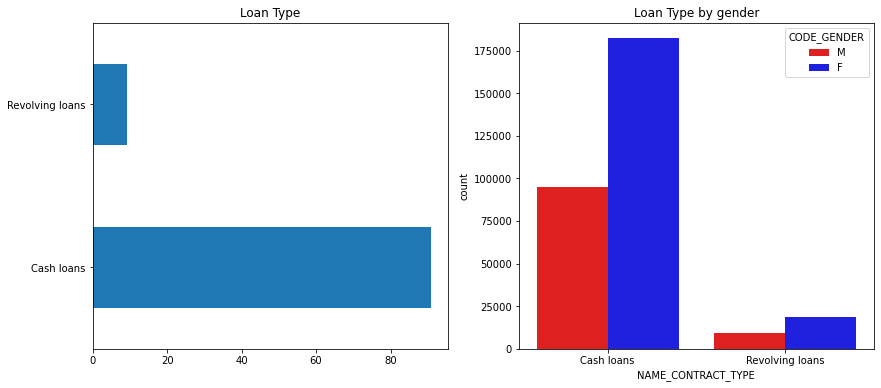

In [276]:
plt.figure(figsize=[14,6])
plt.subplot(121)
(app_data['NAME_CONTRACT_TYPE'].value_counts(normalize = True)*100).plot.barh()
plt.title('Loan Type')

plt.subplot(122)
sns.countplot("NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=app_data,palette=["r","b","g"])
plt.title('Loan Type by gender')

plt.show()


Both the genders prefer Cash loans over Revolving loans

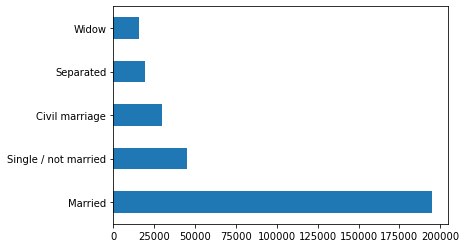

In [277]:
app_data['NAME_FAMILY_STATUS'].value_counts().plot.barh()
plt.show()

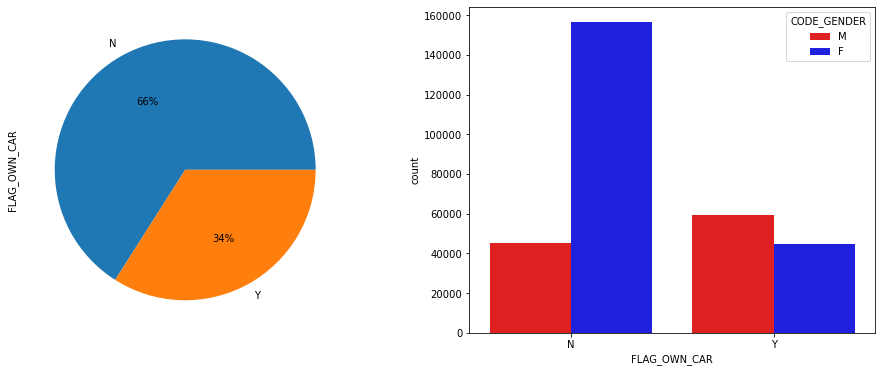

In [278]:
plt.figure(figsize=[16,6])

plt.subplot(121)
app_data['FLAG_OWN_CAR'].value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")

plt.subplot(122)
sns.countplot("FLAG_OWN_CAR",hue="CODE_GENDER",data=app_data,palette=["r","b","g"])
plt.show()

#### 34% Clients own a car.
#### Majority of Clients owning a car are male

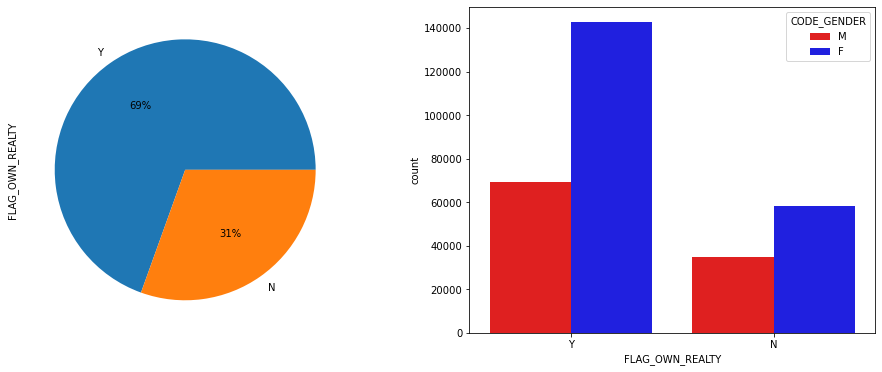

In [279]:
plt.figure(figsize=[16,6])

plt.subplot(121)
app_data['FLAG_OWN_REALTY'].value_counts(normalize=True).plot.pie(autopct = "%1.0f%%")

plt.subplot(122)
sns.countplot("FLAG_OWN_REALTY",hue="CODE_GENDER",data=app_data,palette=["r","b","g"])
plt.show()

69% Clients own a house/flat. Majority of Clients owning a house/flat are male

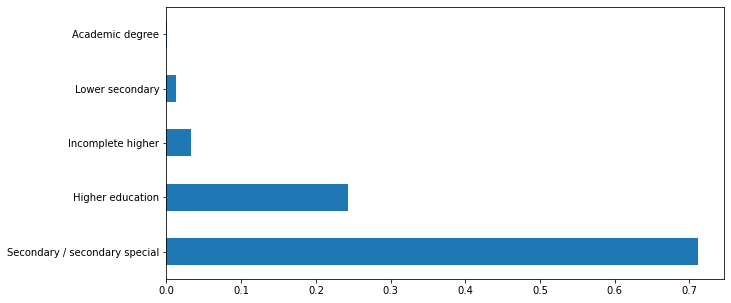

In [280]:
plt.figure(figsize = [10,5])
app_data['NAME_EDUCATION_TYPE'].value_counts(normalize= True).plot.barh()
plt.show()

#### More than 90% of the clients are Repayers

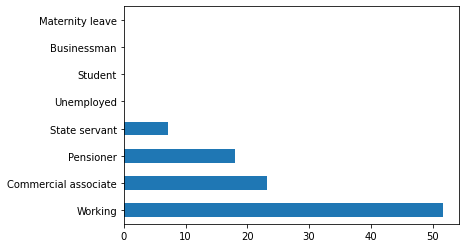

In [282]:
(app_data['NAME_INCOME_TYPE'].value_counts(normalize = True)*100).plot.barh()
plt.show()


In [283]:
app_data['Salary in Thousand'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])


0.50    145.65375
0.70    180.00000
0.90    270.00000
0.95    337.50000
0.99    454.50000
Name: Salary in Thousand, dtype: float64

In [284]:
app_data['Salary in Thousand'].describe()

count    305184.000000
mean        168.231219
std         108.438491
min          25.650000
25%         112.500000
50%         145.653750
75%         202.500000
max       18000.090000
Name: Salary in Thousand, dtype: float64

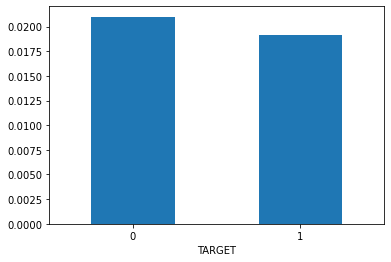

In [285]:
app_data.groupby('TARGET')['REGION_POPULATION_RELATIVE'].mean().plot.bar()
plt.xticks(rotation = 0)
plt.show()

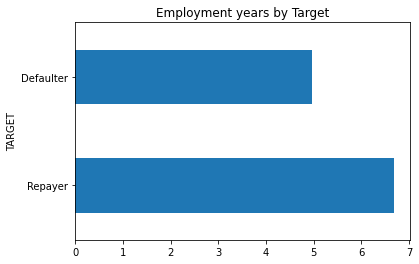

In [286]:
app_data.groupby('TARGET')['Employment (in Yrs)'].mean().plot.barh()
plt.xticks(rotation = 0)
plt.title('Employment years by Target')
plt.yticks([1,0],['Defaulter','Repayer'])
plt.show()

#### Average of employment years is less in case of deaulters as comapred to non-defaulters

In [287]:
app_data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand,Salary in Thousand,Goods_Amt in Thousand,Credit_amt in Thousand
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26,1.7,10.0,122,24.7,202.5,351.0,406.5975


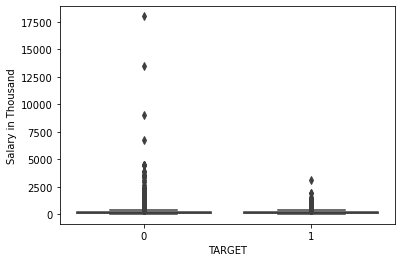

In [288]:
sns.boxplot(data=app_data,x="TARGET", y='Salary in Thousand')
plt.show()

### Segmented Analysis for non-defaulters

In [289]:
Client_NDefault = app_data[app_data['TARGET'] == 0]

In [290]:
Client_NDefault.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand,Salary in Thousand,Goods_Amt in Thousand,Credit_amt in Thousand
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46,3.3,3.2,40,35.70,270.0,1129.5,1293.5025
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,52,0.6,11.7,142,6.75,67.5,135.0,135.0000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,-617.0,52,8.3,26.9,328,29.69,135.0,297.0,312.6825
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,-1106.0,55,8.3,11.8,144,21.87,121.5,513.0,513.0000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.0,0.0,0.0,0.0,-2536.0,46,4.4,13.6,166,27.52,99.0,454.5,490.4955


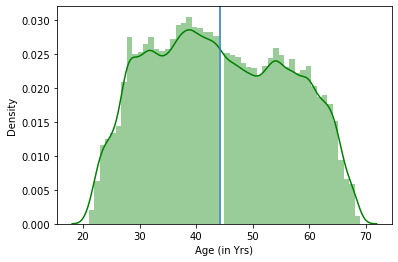

In [291]:
sns.distplot(Client_NDefault['Age (in Yrs)'], color = 'green')
plt.axvline(Client_NDefault['Age (in Yrs)'].mean())
plt.show()

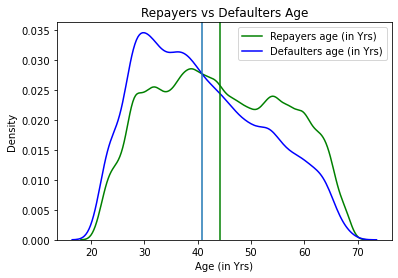

In [292]:
plt.subplots()
sns.distplot(Client_NDefault['Age (in Yrs)'],label = 'Repayers age (in Yrs)', hist = False, color = 'green')
sns.distplot(Client_Default['Age (in Yrs)'], label = 'Defaulters age (in Yrs)', hist = False, color = 'blue')
plt.axvline(Client_NDefault['Age (in Yrs)'].mean(), color = 'green')
plt.axvline(Client_Default['Age (in Yrs)'].mean())
plt.legend()
plt.title('Repayers vs Defaulters Age')
plt.show()


#### Average age of Non-defaulters is around 44

In [293]:
Client_NDefault['Salary in Thousand'].describe()

count    280466.000000
mean        168.873152
std         110.079367
min          25.650000
25%         112.500000
50%         148.500000
75%         202.500000
max       18000.090000
Name: Salary in Thousand, dtype: float64

<AxesSubplot:>

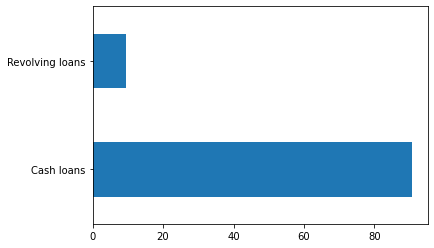

In [294]:
(Client_NDefault['NAME_CONTRACT_TYPE'].value_counts(normalize = True)*100).plot.barh()

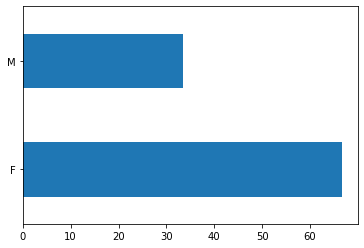

In [295]:
(Client_NDefault[~(Client_NDefault['CODE_GENDER']=='XNA')].CODE_GENDER.value_counts(normalize = True)*100).plot.barh()
plt.show()

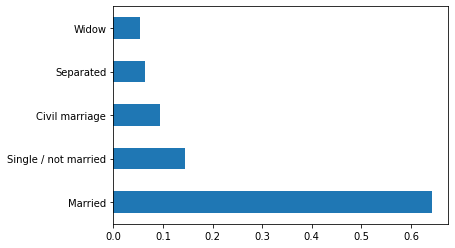

In [296]:
Client_NDefault['NAME_FAMILY_STATUS'].value_counts(normalize = True).plot.barh()
plt.show()

#### More than 60% of the Non defaulter Clients are Married

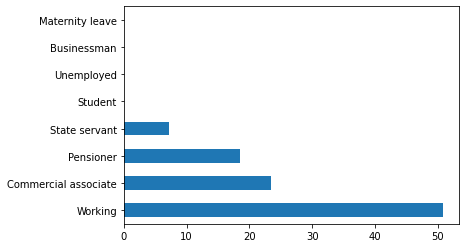

In [297]:
(Client_NDefault['NAME_INCOME_TYPE'].value_counts(normalize = True)*100).plot.barh()
plt.show()

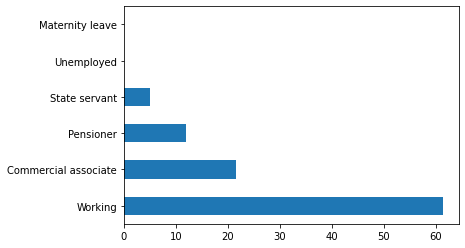

In [298]:
(Client_Default['NAME_INCOME_TYPE'].value_counts(normalize = True)*100).plot.barh()
plt.show()

#### More than 50% of the Non defalter Clients are Working

In [299]:
app_data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand,Salary in Thousand,Goods_Amt in Thousand,Credit_amt in Thousand
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26,1.7,10.0,122,24.7,202.5,351.0,406.5975


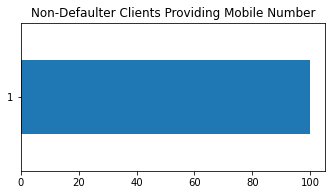

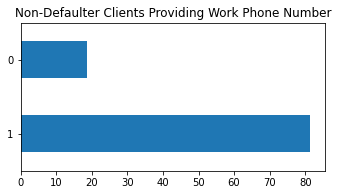

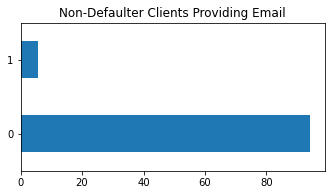

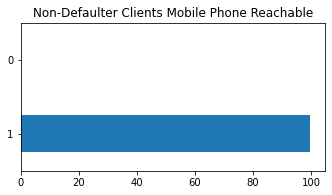

In [300]:
plt.figure(figsize = [12,6])
plt.subplot(221)
(Client_NDefault['FLAG_MOBIL'].value_counts(normalize = True)*100).plot.barh()
plt.title('Non-Defaulter Clients Providing Mobile Number')
plt.figure(figsize = [12,6])
plt.subplot(222)
(Client_NDefault['FLAG_EMP_PHONE'].value_counts(normalize = True)*100).plot.barh()
plt.title('Non-Defaulter Clients Providing Work Phone Number')
plt.figure(figsize = [12,6])
plt.subplot(223)
(Client_NDefault['FLAG_EMAIL'].value_counts(normalize = True)*100).plot.barh()
plt.title('Non-Defaulter Clients Providing Email')
plt.figure(figsize = [12,6])
plt.subplot(224)
(Client_NDefault['FLAG_CONT_MOBILE'].value_counts(normalize = True)*100).plot.barh()
plt.title('Non-Defaulter Clients Mobile Phone Reachable')
plt.show()

#### About 80% of the Non-defaulter clients provide their work phone mumber
#### More than 90% of the clients did not provide their Email

In [301]:
Client_NDefault[['Goods_Amt in Thousand','Credit_amt in Thousand']].corr()

,Goods_Amt in Thousand,Credit_amt in Thousand
Goods_Amt in Thousand,1.000000,0.987259
Credit_amt in Thousand,0.987259,1.000000


In [302]:
app_data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand,Salary in Thousand,Goods_Amt in Thousand,Credit_amt in Thousand
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26,1.7,10.0,122,24.7,202.5,351.0,406.5975


In [393]:
Client_NDefault['Salary in Thousand'].mean()

168.87315218042465

### Segmented Analysis for defaulters

In [394]:
Client_Default['Salary in Thousand'].mean()

160.94743565417917

In [303]:
Client_Default = app_data[app_data['TARGET'] == 1]

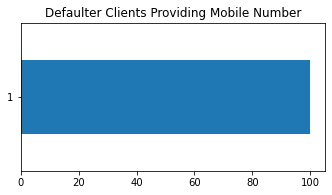

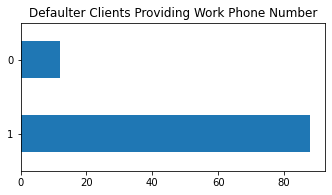

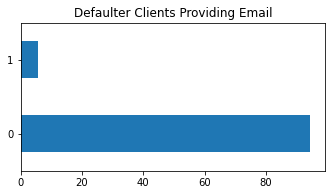

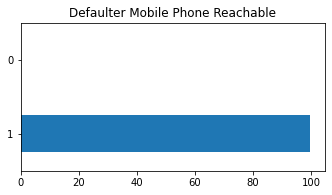

In [304]:
plt.figure(figsize = [12,6])
plt.subplot(221)
(Client_Default['FLAG_MOBIL'].value_counts(normalize = True)*100).plot.barh()
plt.title('Defaulter Clients Providing Mobile Number')

plt.figure(figsize = [12,6])
plt.subplot(222)
(Client_Default['FLAG_EMP_PHONE'].value_counts(normalize = True)*100).plot.barh()
plt.title('Defaulter Clients Providing Work Phone Number')

plt.figure(figsize = [12,6])
plt.subplot(223)
(Client_Default['FLAG_EMAIL'].value_counts(normalize = True)*100).plot.barh()
plt.title('Defaulter Clients Providing Email')

plt.figure(figsize = [12,6])
plt.subplot(224)
(Client_Default['FLAG_CONT_MOBILE'].value_counts(normalize = True)*100).plot.barh()
plt.title('Defaulter Mobile Phone Reachable')
plt.show()

#### About 90% of the deaulters provide work phone number
#### More than 90% of the defaulters did not provide their Email


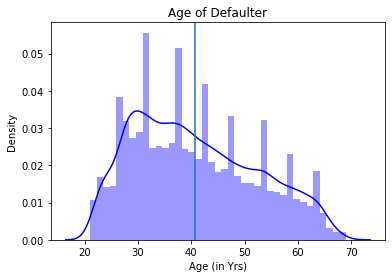

In [305]:
sns.distplot(Client_Default['Age (in Yrs)'],color = 'blue')
plt.axvline(Client_Default['Age (in Yrs)'].mean())
plt.title('Age of Defaulter')
plt.show()

#### Average age of defaulters is around 41

### Multivariate Analysis

In [306]:
res = pd.pivot_table(data = Client_Default, index = 'NAME_HOUSING_TYPE', columns = 'NAME_FAMILY_STATUS', values = 'Salary in Thousand', aggfunc = lambda x:x.median())


In [307]:
res

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow
NAME_HOUSING_TYPE,,,,,
Co-op apartment,180.0,153.0,146.25,180.0,247.50
House / apartment,144.0,135.0,157.50,135.0,135.00
Municipal apartment,135.0,135.0,155.25,144.0,130.50
Office apartment,135.0,135.0,202.50,144.0,139.50
Rented apartment,157.5,157.5,135.00,135.0,112.50
With parents,135.0,135.0,135.00,135.0,132.75


<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='NAME_HOUSING_TYPE'>

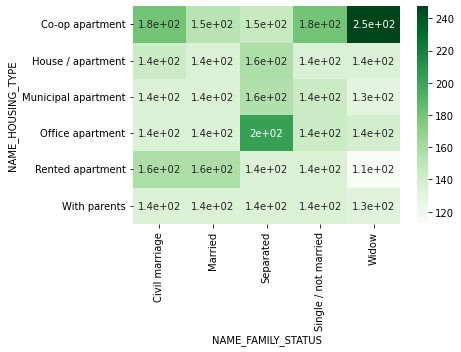

In [308]:
sns.heatmap(res, annot = True,cmap = 'Greens')

#### The highest salary and lowest salary for defaulters is for the widow living in co-op apartment and rented apartment respectively

In [309]:
app_data.groupby('TARGET').mean()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand,Salary in Thousand,Goods_Amt in Thousand,Credit_amt in Thousand
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,278230.438017,0.413013,168873.152180,602907.169646,27191.521910,542562.521780,0.020995,-16143.609232,65772.634269,-5032.006364,-3017.739188,1.0,0.814441,0.196330,0.998139,0.284505,0.056973,2.150628,2.044376,2.023186,12.082616,0.014957,0.050249,0.040376,0.074647,0.224277,0.176032,1.415102,0.139129,1.398301,0.096668,-978.778968,44.231094,6.684364,13.786254,167.732199,27.191568,168.873152,542.562522,602.907170
1,277419.207420,0.464075,160947.435654,558144.963974,26515.430213,489037.970062,0.019127,-14884.896472,42348.222914,-4487.113035,-2732.622259,1.0,0.879642,0.237924,0.998179,0.245004,0.055466,2.181447,2.154139,2.135286,11.796060,0.017477,0.055870,0.042439,0.118618,0.303018,0.221620,1.495631,0.191804,1.477264,0.138118,-809.172384,40.779270,4.972921,12.293503,149.568614,26.515416,160.947436,489.037970,558.144964


In [310]:
cols = ['Salary in Thousand', 'Credit_amt in Thousand','Annuity_amt in Thousand', 'Goods_Amt in Thousand']

df = app_data.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)


In [311]:
df_new.head()

TARGET,amount_type,statistic,amount,type
1,Salary in Thousand,mean,168.873152,REPAYER
2,Salary in Thousand,std,110.079367,REPAYER
3,Salary in Thousand,min,25.650000,REPAYER
7,Salary in Thousand,max,18000.090000,REPAYER
9,Credit_amt in Thousand,mean,602.907170,REPAYER


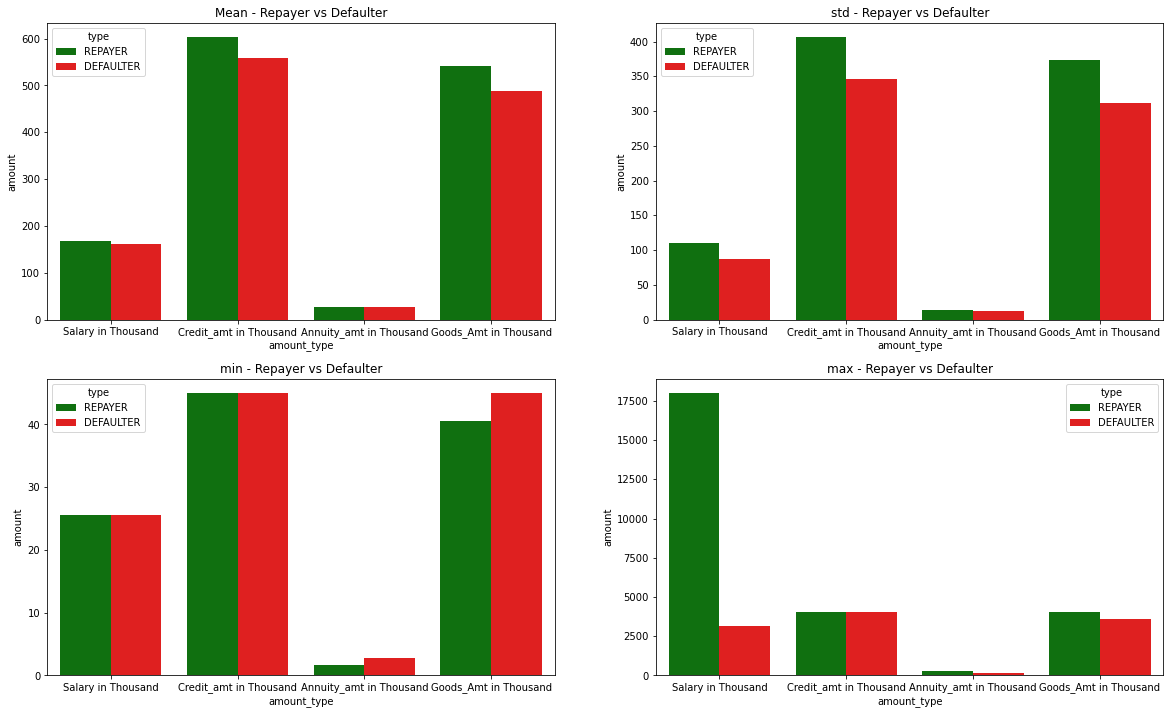

In [312]:
plt.figure(figsize = [20,12])
plt.subplot(2,2,1)
plt.title('Mean - Repayer vs Defaulter')
sns.barplot(df_new[df_new["statistic"] == 'mean']["amount_type"],df_new[df_new["statistic"] == 'mean']["amount"],
                hue=df_new[df_new["statistic"] == 'mean']["type"],palette=["g","r"])
plt.subplot(2,2,2)
plt.title('std - Repayer vs Defaulter')
sns.barplot(df_new[df_new["statistic"] == 'std']["amount_type"],df_new[df_new["statistic"] == 'std']["amount"],
                hue=df_new[df_new["statistic"] == 'std']["type"],palette=["g","r"])
plt.subplot(2,2,3)
plt.title('min - Repayer vs Defaulter')
sns.barplot(df_new[df_new["statistic"] == 'min']["amount_type"],df_new[df_new["statistic"] == 'min']["amount"],
                hue=df_new[df_new["statistic"] == 'min']["type"],palette=["g","r"])
plt.subplot(2,2,4)
plt.title('max - Repayer vs Defaulter')
sns.barplot(df_new[df_new["statistic"] == 'max']["amount_type"],df_new[df_new["statistic"] == 'max']["amount"],
                hue=df_new[df_new["statistic"] == 'max']["type"],palette=["g","r"])
plt.show()

#### Average income of the Defaulter and Non-defaulter Client are same

#### Standard deviation of income of defaulter is very high as compared to Non-defaulter

#### Max income of defaulter is very high as compared to Non-defaulter

In [313]:
app_data.head(1)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand,Salary in Thousand,Goods_Amt in Thousand,Credit_amt in Thousand
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26,1.7,10.0,122,24.7,202.5,351.0,406.5975


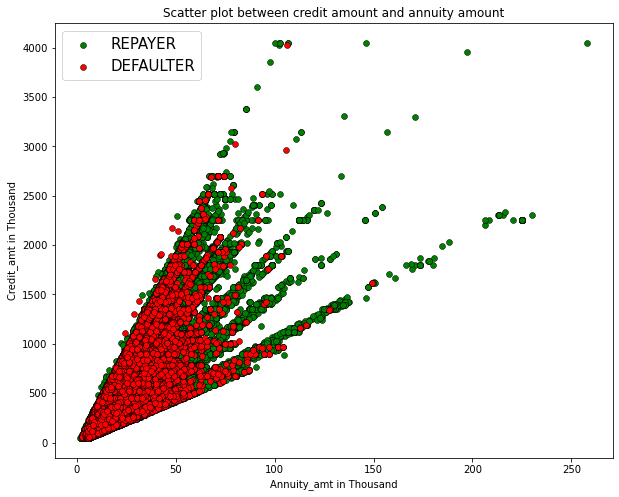

In [314]:
plt.figure(figsize=(10,8))
plt.scatter(app_data[app_data["TARGET"]==0]['Annuity_amt in Thousand'],app_data[app_data["TARGET"]==0]['Credit_amt in Thousand'],s=35,
            color="g",label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(app_data[app_data["TARGET"]==1]['Annuity_amt in Thousand'],app_data[app_data["TARGET"]==1]['Credit_amt in Thousand'],s=35,
            color="r",label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("Annuity_amt in Thousand")
plt.ylabel("Credit_amt in Thousand")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

<Figure size 864x576 with 0 Axes>

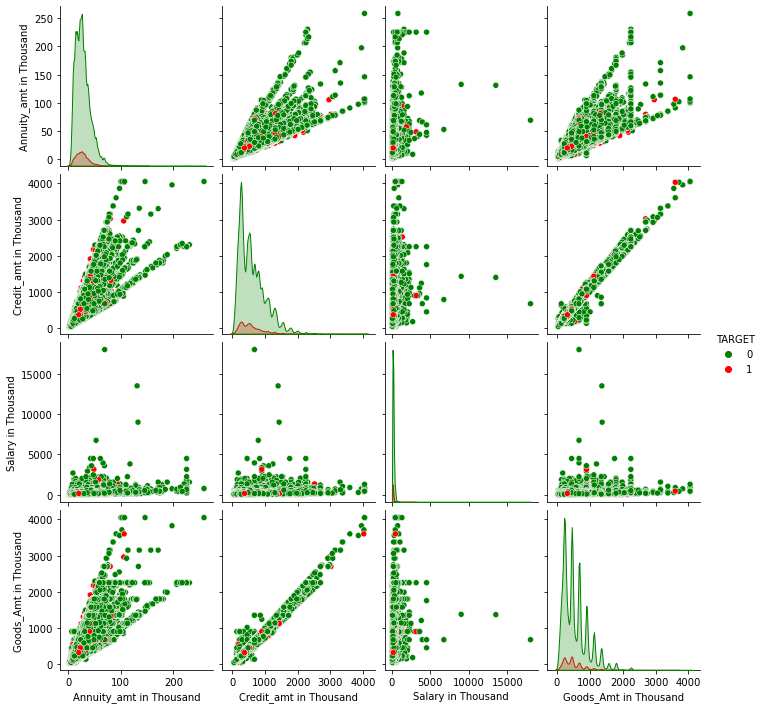

In [370]:
plt.figure(figsize = (12,8))
amt = app_data[[ 'Salary in Thousand','Credit_amt in Thousand',
                         'Annuity_amt in Thousand', 'Goods_Amt in Thousand',"TARGET"]]
amt = amt[(amt["Goods_Amt in Thousand"].notnull()) & (amt["Annuity_amt in Thousand"].notnull())]
sns.pairplot(data = amt, vars=['Annuity_amt in Thousand','Credit_amt in Thousand','Salary in Thousand','Goods_Amt in Thousand'], hue='TARGET', palette= ['g','r'])
plt.show()

In [316]:
cd = Client_Default[['Annuity_amt in Thousand','Credit_amt in Thousand','Salary in Thousand','Goods_Amt in Thousand']].corr()

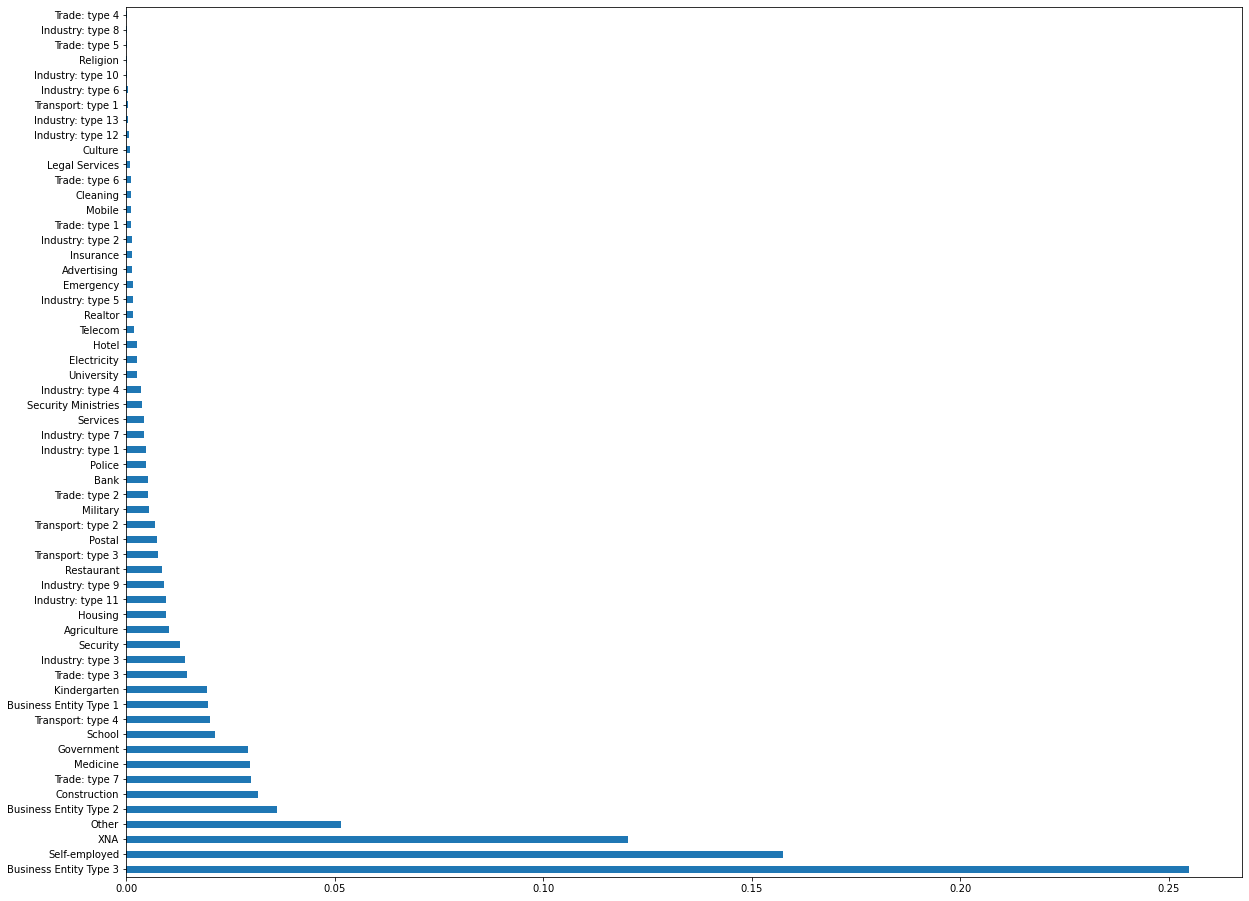

In [406]:
plt.figure(figsize = (20,16))
Client_Default['ORGANIZATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

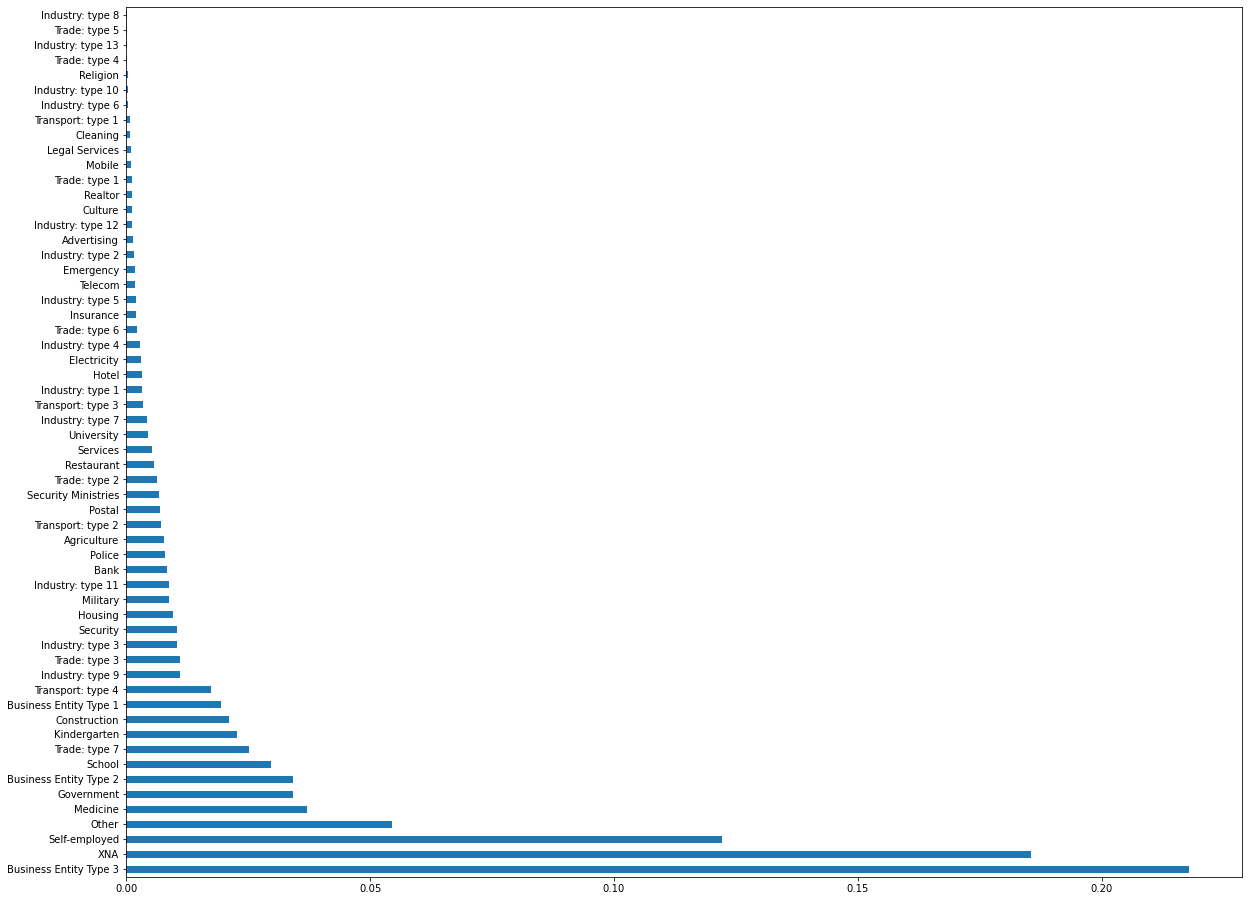

In [407]:
plt.figure(figsize = (20,16))
Client_NDefault['ORGANIZATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.show()

In [320]:
cnd = Client_NDefault[['Annuity_amt in Thousand','Credit_amt in Thousand','Salary in Thousand','Goods_Amt in Thousand']].corr()

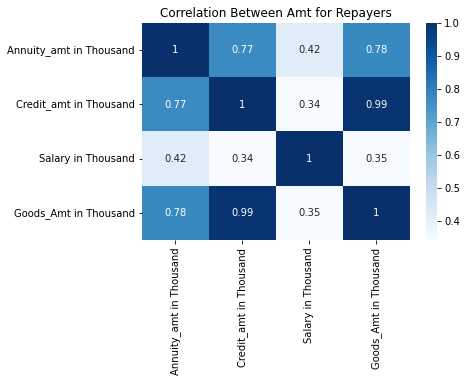

In [321]:
sns.heatmap(cnd, annot = True, cmap = 'Blues')
plt.title('Correlation Between Amt for Repayers')
plt.show()

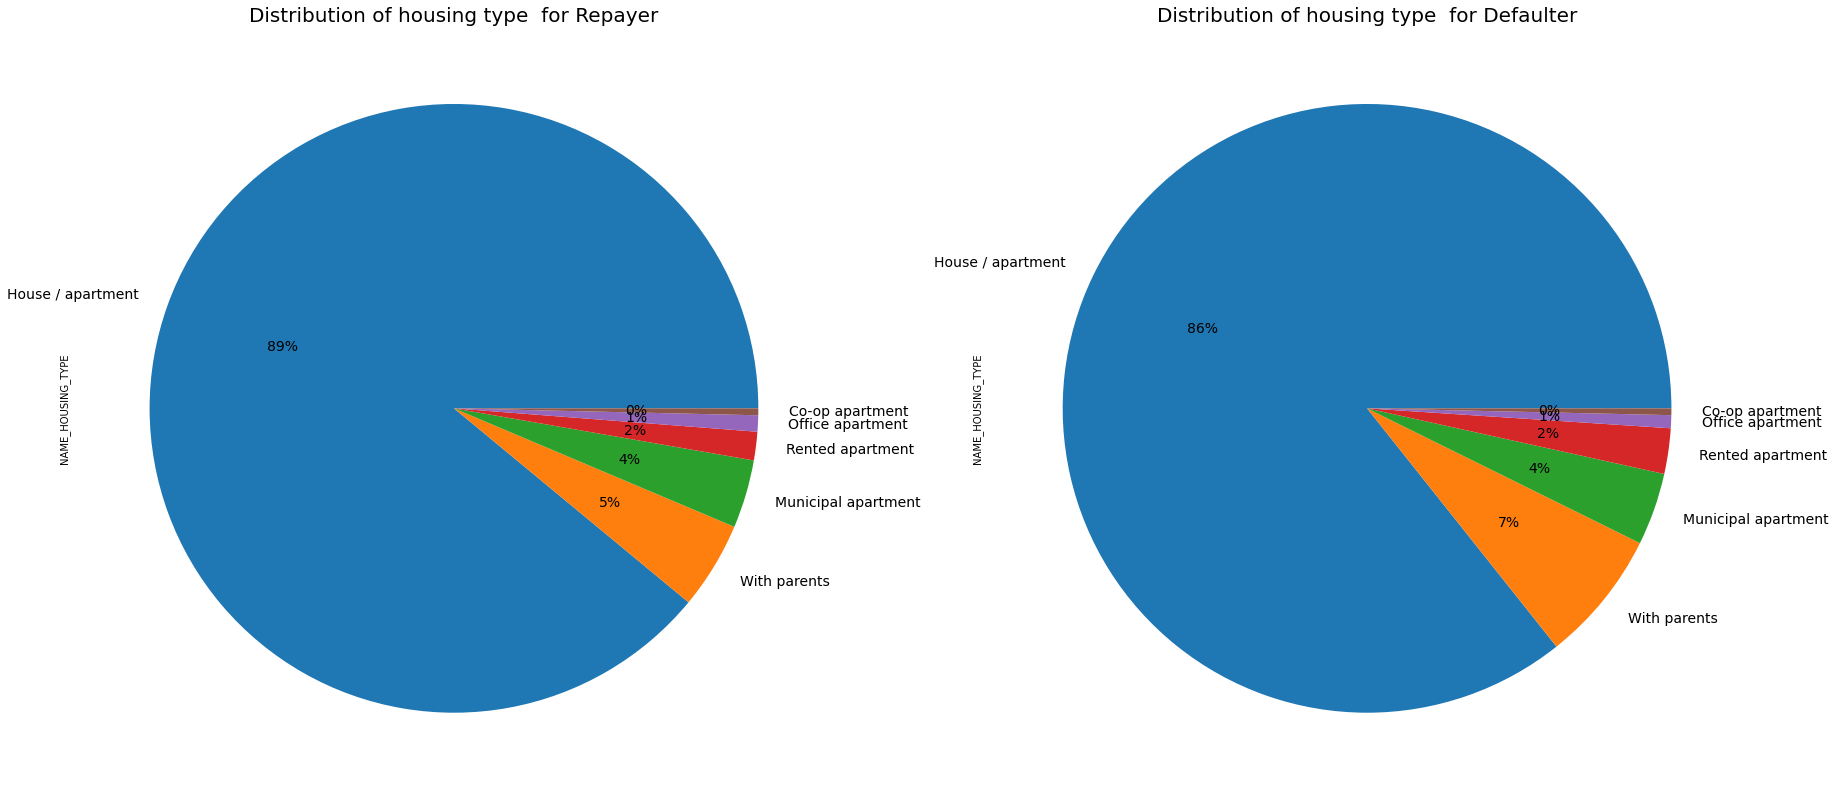

In [322]:
plt.figure(figsize = (30,20))
plt.subplot(121)
plt.title("Distribution of housing type  for Repayer", fontsize = 20)
app_data[app_data['TARGET']==0]['NAME_HOUSING_TYPE'].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=14,)

plt.subplot(122)
plt.title("Distribution of housing type  for Defaulter", fontsize = 20)
app_data[app_data['TARGET']==1]['NAME_HOUSING_TYPE'].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=14)
plt.show()

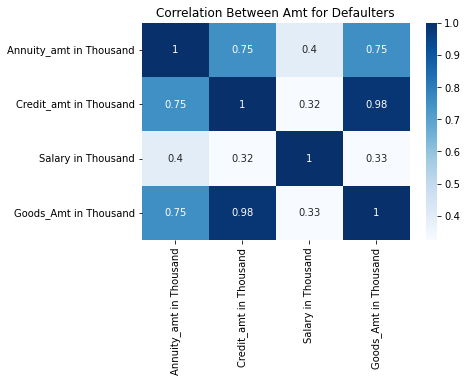

In [317]:
sns.heatmap(cd, annot = True, cmap = 'Blues')
plt.title('Correlation Between Amt for Defaulters')
plt.show()

In [323]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
((prev_app.isnull().sum()/prev_app.shape[0])*100)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [325]:
temp1 = ((prev_app.isnull().sum()/prev_app.shape[0])*100).reset_index().rename(columns = {'index':'col_name', 0:'% Missing'})

In [326]:
drop_cols1 = list(temp1[temp1['% Missing']>=30]['col_name'])

In [327]:
drop_cols1

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [328]:
prev_app.drop(drop_cols1,axis = 1, inplace = True)

In [329]:
prev_app.shape

(1670214, 26)

In [330]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [331]:
prev_app.isnull().sum()/len(prev_app)*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [332]:
prev_app[prev_app['AMT_ANNUITY'].isnull()].head(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,TUESDAY,11,Y,1,XNA,Canceled,-14,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,MONDAY,7,Y,1,XNA,Canceled,-21,XNA,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash


In [333]:
prev_app['NAME_CONTRACT_STATUS'].unique().tolist()

['Approved', 'Refused', 'Canceled', 'Unused offer']

In [334]:
prev_app['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [335]:
prev_app['AMT_ANNUITY'].mean()

15955.120659450406

In [336]:
prev_app['AMT_GOODS_PRICE'].isnull().sum()

385515

In [337]:
prev_app['CNT_PAYMENT'].isnull().sum()

372230

In [338]:
prev_app = prev_app[~prev_app['PRODUCT_COMBINATION'].isnull()]

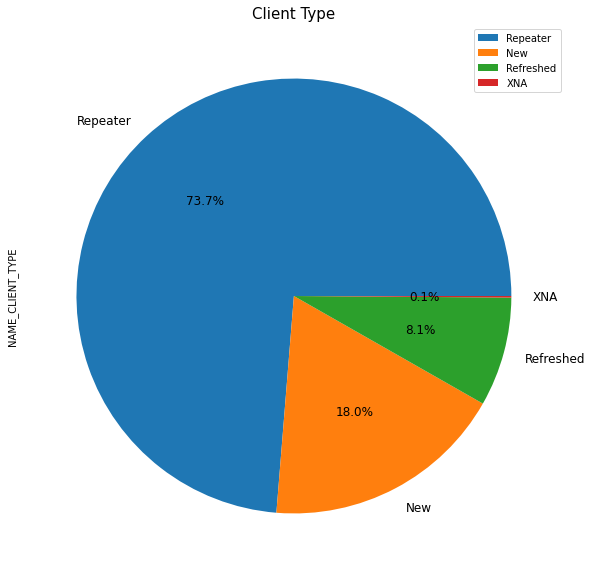

In [339]:
plt.figure(figsize=(12,10))
prev_app['NAME_CLIENT_TYPE'].value_counts().plot.pie(autopct = '%1.1f%%', fontsize = 12)
plt.title("Client Type", fontsize = 15)
plt.legend()
plt.show()

#### 73.7% Clients are old clients

In [340]:
prev_app[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]

,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS
0,XAP,Approved
1,XNA,Approved
2,XNA,Approved
3,XNA,Approved
4,Repairs,Refused
...,...,...
1670209,XAP,Approved
1670210,XAP,Approved
1670211,XAP,Approved
1670212,XNA,Approved


In [341]:
Loanpurpose = pd.crosstab(prev_app["NAME_CASH_LOAN_PURPOSE"],prev_app["NAME_CONTRACT_STATUS"])

In [342]:
Loanpurpose.head()

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
NAME_CASH_LOAN_PURPOSE,,,,
Building a house or an annex,675,98,1920,0
Business development,130,19,277,0
Buying a garage,39,8,89,0
Buying a holiday home / land,132,19,382,0
Buying a home,200,39,626,0


In [343]:
Loanpurpose["a"] = (Loanpurpose["Approved"]*100)/(Loanpurpose["Approved"]+Loanpurpose["Canceled"]+Loanpurpose["Refused"]+Loanpurpose["Unused offer"])


In [344]:
Loanpurpose

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer,a
NAME_CASH_LOAN_PURPOSE,,,,,
Building a house or an annex,675,98,1920,0,25.064983
Business development,130,19,277,0,30.516432
Buying a garage,39,8,89,0,28.676471
Buying a holiday home / land,132,19,382,0,24.765478
Buying a home,200,39,626,0,23.121387
Buying a new car,221,50,735,6,21.837945
Buying a used car,881,98,1896,13,30.505540
Car repairs,358,17,422,0,44.918444
Education,765,21,782,5,48.633185


In [345]:
Loanpurpose["a"] = (Loanpurpose["Approved"]*100)/Loanpurpose[["Approved","Canceled","Refused","Unused offer"]].sum(axis = 1)

In [346]:
Loanpurpose["c"] = (Loanpurpose["Canceled"]*100)/Loanpurpose[["Approved","Canceled","Refused","Unused offer"]].sum(axis = 1)
Loanpurpose["r"] = (Loanpurpose["Refused"]*100)/Loanpurpose[["Approved","Canceled","Refused","Unused offer"]].sum(axis = 1)
Loanpurpose["u"] = (Loanpurpose["Unused offer"]*100)/Loanpurpose[["Approved","Canceled","Refused","Unused offer"]].sum(axis = 1)

In [347]:
Loanpurposenew= Loanpurpose[['a','c','r','u']]

In [348]:
Loanpurposenew = Loanpurposenew.stack().reset_index()

In [349]:
Loanpurposenew['NAME_CONTRACT_STATUS'] = Loanpurposenew['NAME_CONTRACT_STATUS'].replace({'a':'Approved','c':'Canceled','r':'Refused','u':'Unused offer'})

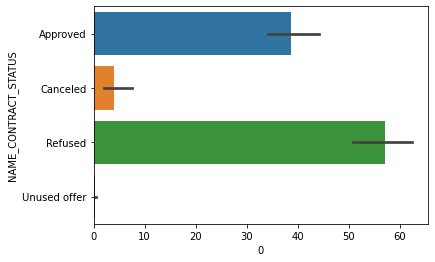

In [350]:
sns.barplot(Loanpurposenew[0],Loanpurposenew['NAME_CONTRACT_STATUS'])
plt.show()

#### About 40% Loans are approved and 57% Loans are refused in previous application

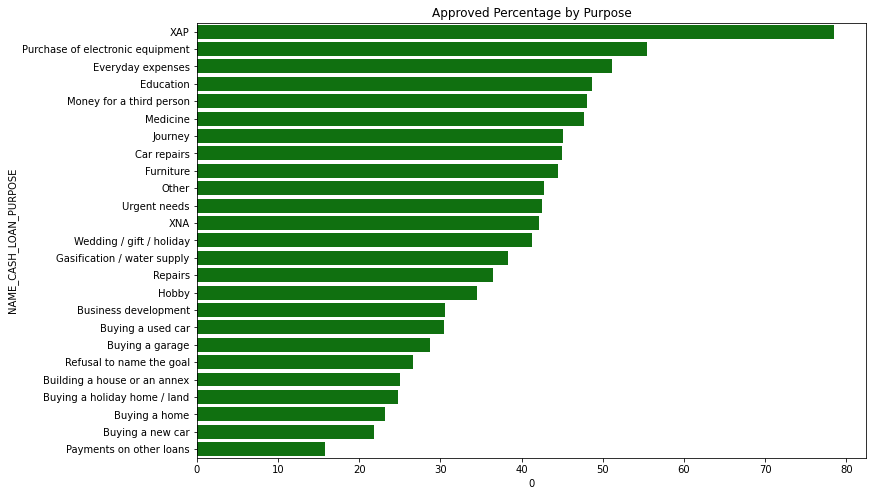

In [351]:
plt.figure(figsize = (12,8))
sns.barplot(0,'NAME_CASH_LOAN_PURPOSE',data = Loanpurposenew[Loanpurposenew['NAME_CONTRACT_STATUS']=='Approved'].sort_values(by = 0, ascending = False),
            color= 'g')
plt.title('Approved Percentage by Purpose')
plt.show()

#### XAP has the highest percentage for loan approval which is about 80%
#### Purchase of electronic equipment has the second highest percentage

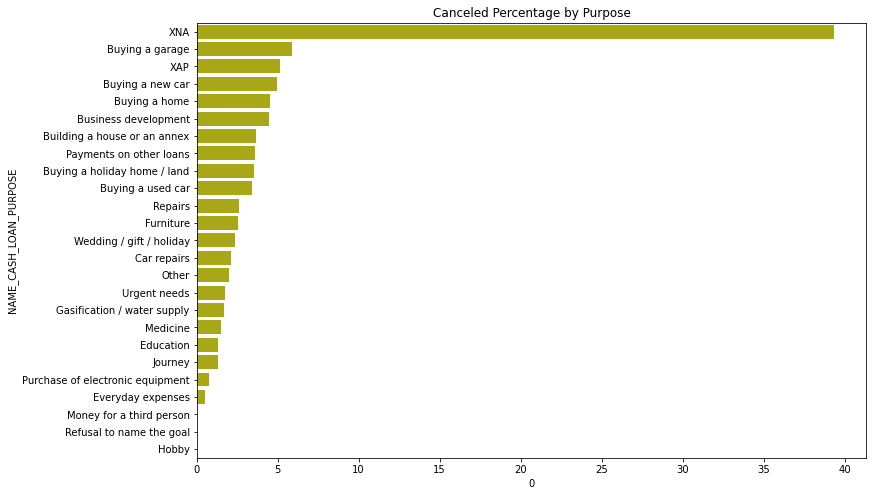

In [352]:
plt.figure(figsize = (12,8))
sns.barplot(0,'NAME_CASH_LOAN_PURPOSE',data = Loanpurposenew[Loanpurposenew['NAME_CONTRACT_STATUS']=='Canceled'].sort_values(by = 0, ascending = False),
            color= 'y')
plt.title('Canceled Percentage by Purpose')
plt.show()

#### XNA is the main reason for loan cancellation which is about 40% followed by buying a garage which is about 6%

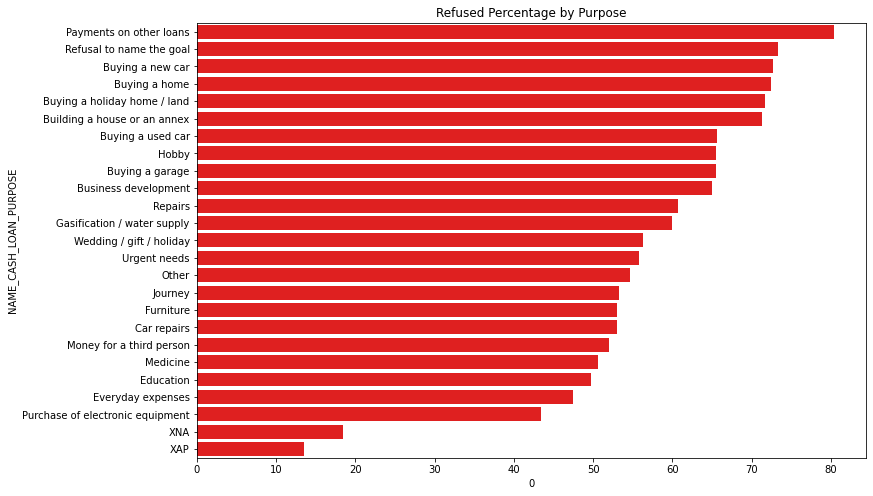

In [353]:
plt.figure(figsize = (12,8))
sns.barplot(0,'NAME_CASH_LOAN_PURPOSE',data = Loanpurposenew[Loanpurposenew['NAME_CONTRACT_STATUS']=='Refused'].sort_values(by = 0, ascending = False),
            color= 'r')
plt.title('Refused Percentage by Purpose')
plt.show()

#### Most of the loans are refused due to Payments on other loans followed by refusal due to not providing the name of the goal for loan

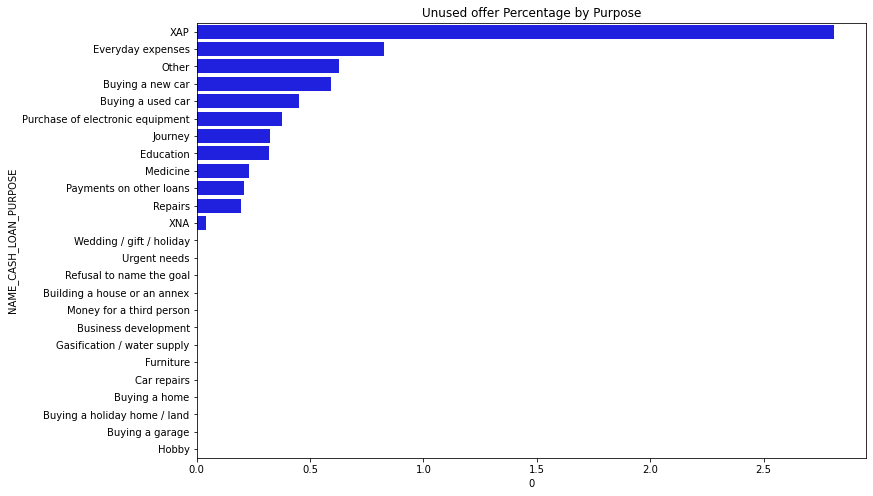

In [354]:
plt.figure(figsize = (12,8))
sns.barplot(0,'NAME_CASH_LOAN_PURPOSE',data = Loanpurposenew[Loanpurposenew['NAME_CONTRACT_STATUS']=='Unused offer'].sort_values(by = 0, ascending = False),
            color= 'b')
plt.title('Unused offer Percentage by Purpose')
plt.show()

#### XAP is the main reason for Unused offer followed by everyday expenses

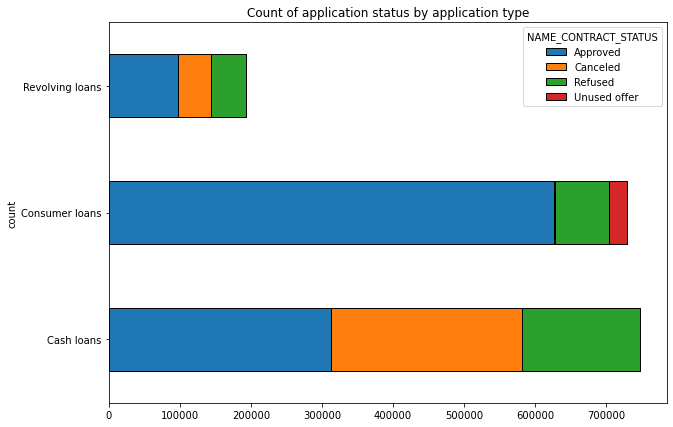

In [355]:
pd.crosstab(prev_app["NAME_CONTRACT_TYPE"],prev_app["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),edgecolor = 'k',stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")
plt.show()

#### Most Approved loans are Consumer loans
#### Most Canceled and Refused loans are Cash loans

In [362]:
mergedf = pd.merge(app_data,prev_app,on = 'SK_ID_CURR', how = 'inner')

In [363]:
mergedf

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,Age (in Yrs),Employment (in Yrs),Registration_change (in Yrs),ID_change (in months),Annuity_amt in Thousand,Salary in Thousand,Goods_Amt in Thousand,Credit_amt in Thousand,Salary_grp,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,26,1.7,10.0,122,24.70,202.5,351.0,406.5975,>200,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46,3.3,3.2,40,35.70,270.0,1129.5,1293.5025,>200,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46,3.3,3.2,40,35.70,270.0,1129.5,1293.5025,>200,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,46,3.3,3.2,40,35.70,270.0,1129.5,1293.5025,>200,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,52,0.6,11.7,142,6.75,67.5,135.0,135.0000,<70,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5,Y,1,XAP,Approved,-815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest
...,...,.

In [364]:
mergedf.groupby('SK_ID_CURR')['SK_ID_PREV'].count().reset_index()

,SK_ID_CURR,SK_ID_PREV
0,100002,1
1,100003,3
2,100004,1
3,100006,9
4,100007,6
...,...,...
289478,456251,1
289479,456252,1
289480,456253,2
289481,456254,2


In [365]:
z = mergedf.groupby('SK_ID_CURR').size()
y = mergedf.groupby('SK_ID_CURR').agg({'TARGET': np.sum})
y['count'] = z
y.head()

,TARGET,count
SK_ID_CURR,,
100002,1,1
100003,0,3
100004,0,1
100006,0,9
100007,0,6
